# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
print("""UNDERSTANDING THE DATASET
      1. The dataset is related to direct marketing campaigns of a Portuguese banking institution
      2. There are 41K records (marketing campaigns) in the "bank-additional-full.csv" dataset
      3. Imbalanced class distribution with positive class only approx 12%
      4. Cleaning of Data is required as there are columns with missing values (Unknown and duplicates)
      5. There are 21 features including the Target variable - 10 Numeric and 11 Categorical, including Target Variable
      6. There is Bank Client Data, Other Attributes (past campaigns) and Social and Economic attributes
      7. The objective is to correctly predict the whether a customer will subscribe to term Deposits
         ensuring that we have the maximum "Bang for the Buck" for the marketing campaign- high recall for the positive class""")

UNDERSTANDING THE DATASET
      1. The dataset is related to direct marketing campaigns of a Portuguese banking institution
      2. There are 41K records (marketing campaigns) in the "bank-additional-full.csv" dataset
      3. Imbalanced class distribution with positive class only approx 12%
      4. Cleaning of Data is required as there are columns with missing values (Unknown and duplicates)
      5. There are 21 features including the Target variable - 10 Numeric and 11 Categorical, including Target Variable
      6. There is Bank Client Data, Other Attributes (past campaigns) and Social and Economic attributes
      7. The objective is to correctly predict the whether a customer will subscribe to term Deposits
         ensuring that we have the maximum "Bang for the Buck" for the marketing campaign- high recall for the positive class


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score




In [3]:
df = pd.read_csv('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# dropping 12 duplicates and reindexing
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

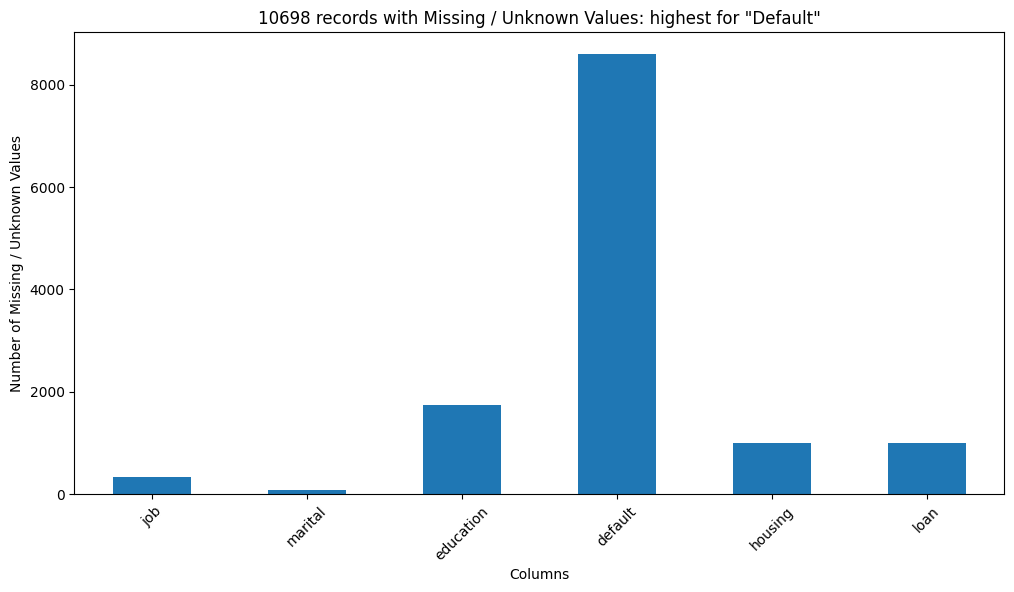

In [8]:
# Missing / Unknown value and plot Unknown Values

unknown_counts = df.isin(['unknown']).sum()
unknown_counts = unknown_counts[unknown_counts > 0]

plt.figure(figsize=(12, 6))
unknown_counts.plot(kind='bar')
plt.title('10698 records with Missing / Unknown Values: highest for "Default"')
plt.xlabel('Columns')
plt.ylabel('Number of Missing / Unknown Values')
plt.xticks(rotation=45)
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/unknown_values.png')
plt.show()


In [9]:
# Dropping the rows with unknown values (assumed as missing) in 'job', 'marital', 'education', 'default', 'housing' and 'loan columns and reindexing
df = df[~df['job'].isin(['unknown'])]
df = df[~df['marital'].isin(['unknown'])]
df = df[~df['education'].isin(['unknown'])]
df = df[~df['default'].isin(['unknown'])]
df = df[~df['housing'].isin(['unknown'])]
df = df[~df['loan'].isin(['unknown'])]
df.reset_index(drop=True, inplace=True)


In [10]:

df["pdays"] = df["pdays"].replace(999, -1)  # Replacing 999 with -1

In [11]:
# Drop the column "duration" (Not to be used for prediction)
df = df.drop(columns=['duration'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  pdays           30478 non-null  int64  
 12  previous        30478 non-null  int64  
 13  poutcome        30478 non-null  object 
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [13]:
# Target variable changed from 'yes'/'no' to 1/0
df["y"] = df["y"].map({"yes": 1, "no": 0})

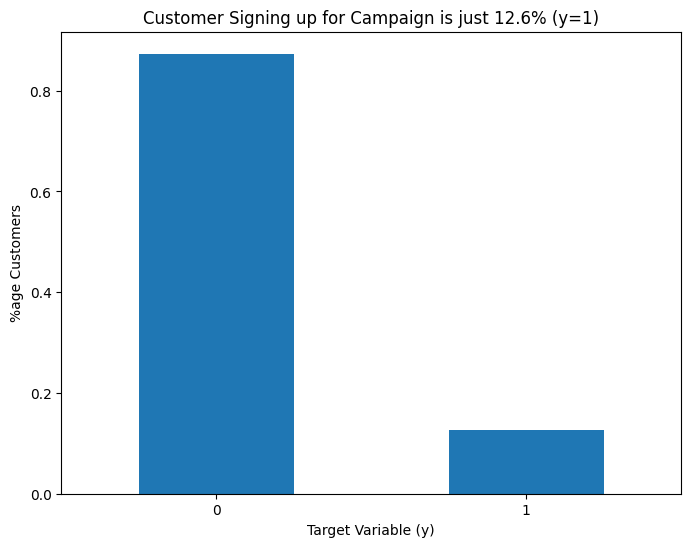

In [14]:
# IMBALANCED DATASET : TARGET VARIABLE
plt.figure(figsize=(8, 6))
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.title('Customer Signing up for Campaign is just 12.6% (y=1)')
plt.xlabel('Target Variable (y)')
plt.ylabel('%age Customers')
plt.xticks(rotation=0)
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Conversion_rate.png')

plt.show()

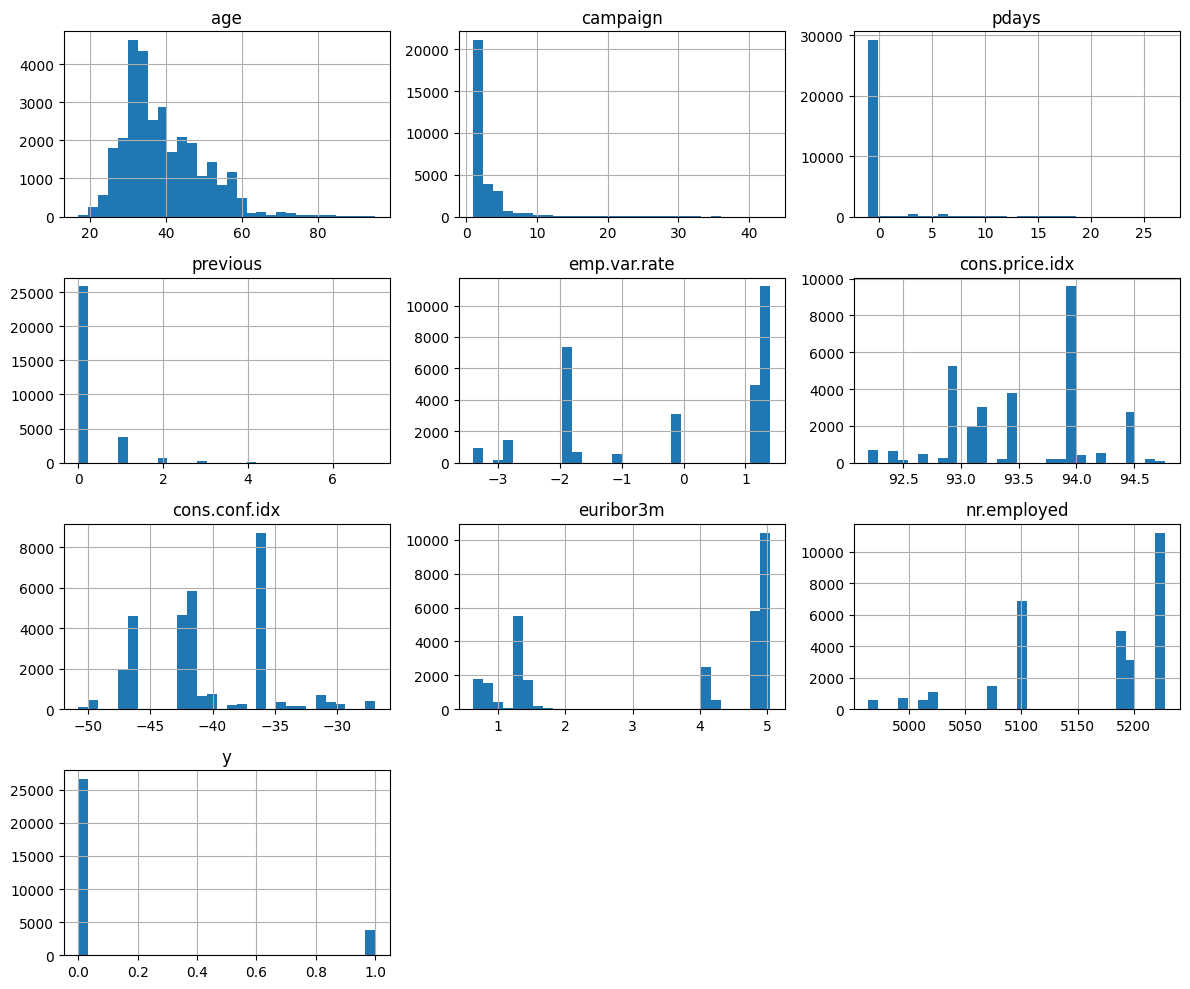

In [15]:
# Histogram of Numerical Features and add color of target variable

df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Histograms.png')
plt.show()

<Figure size 1200x1200 with 0 Axes>

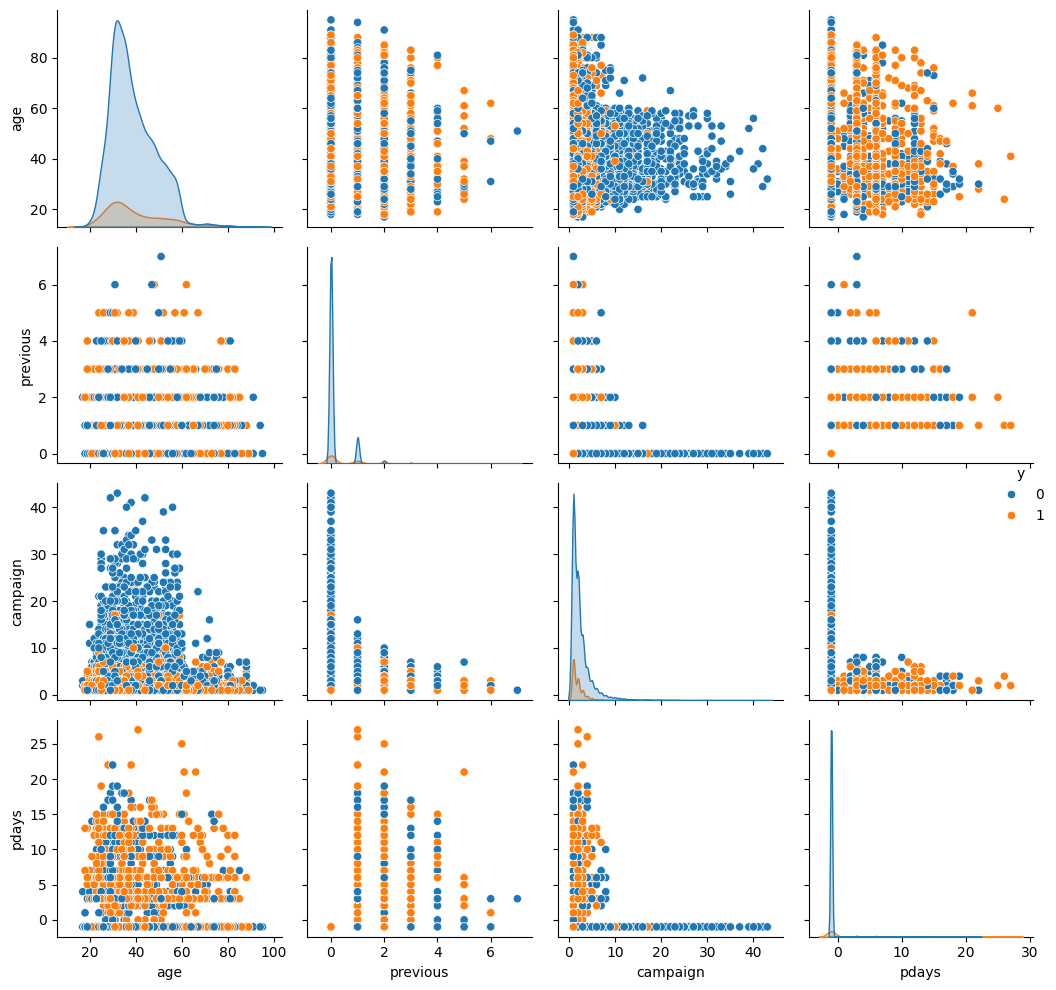

In [16]:
# pairplot for non social/economic numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(df, vars= ["age", "previous", "campaign", "pdays"], hue='y', diag_kind='kde')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Pairplot-non social economic.png')
plt.show();

<Figure size 1200x1200 with 0 Axes>

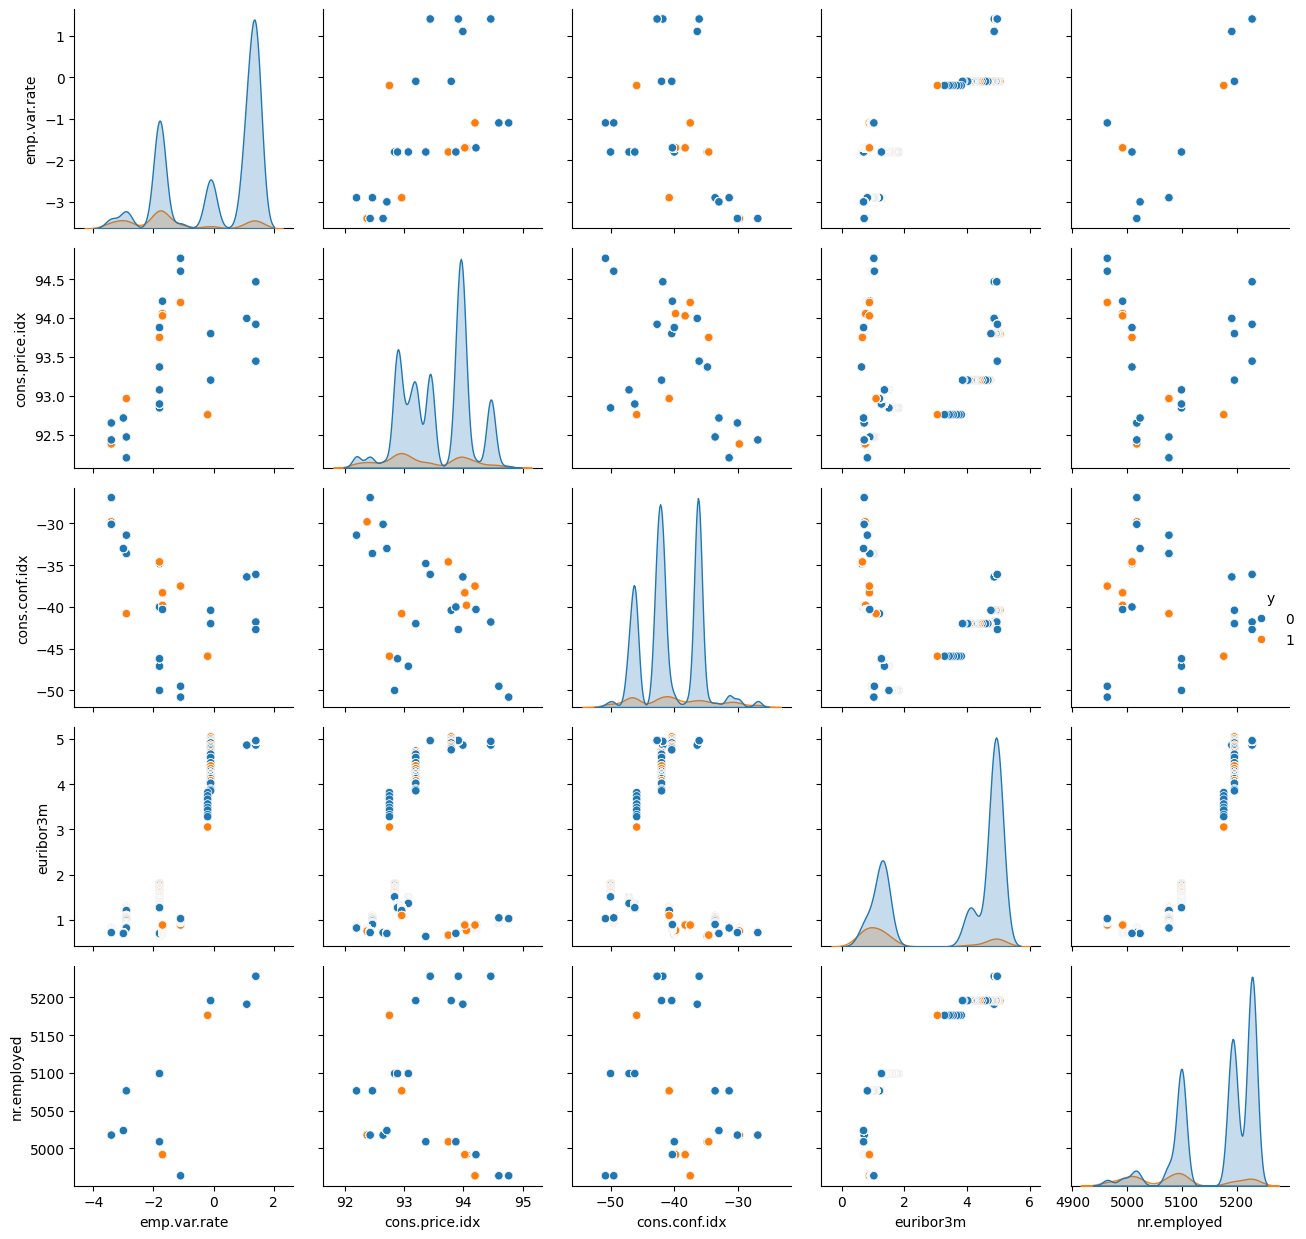

In [17]:
# pairplot for social/economic numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(df, vars= ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], hue='y', diag_kind='kde')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Pairplot-social economic.png')
plt.show();

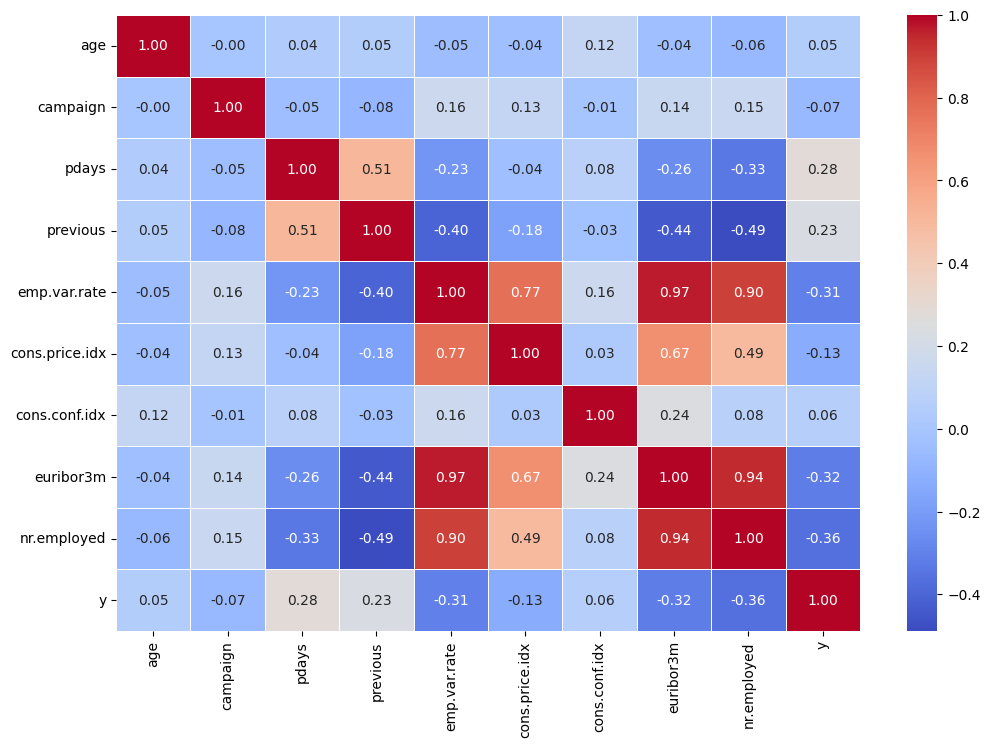

In [18]:
# FINDINGS: Most important Numerical features are: 
# 'previous', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'

# Heatmap to check correlation between features

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Heatmap.png')
plt.show()

 FINDINGS: 
    Most important Categorical features are: 
    1. 'Job', 'Education', 'Default', 'Month', 'Poutcome'
    2. "No Default" have a very significant impact on Conversion Rate
    3. "Student" and "Retired" have higher conversion rates (over 25%)
    4. "Illiterate" category have a higher conversion rate (over 25%) compared to other education levels
    5. "Sept, Oct, Dec and March" have over 40% conversion rates
    6. "Poutcome": Success of the previous campaign outcome leads to higher conversion rates (over 60%)


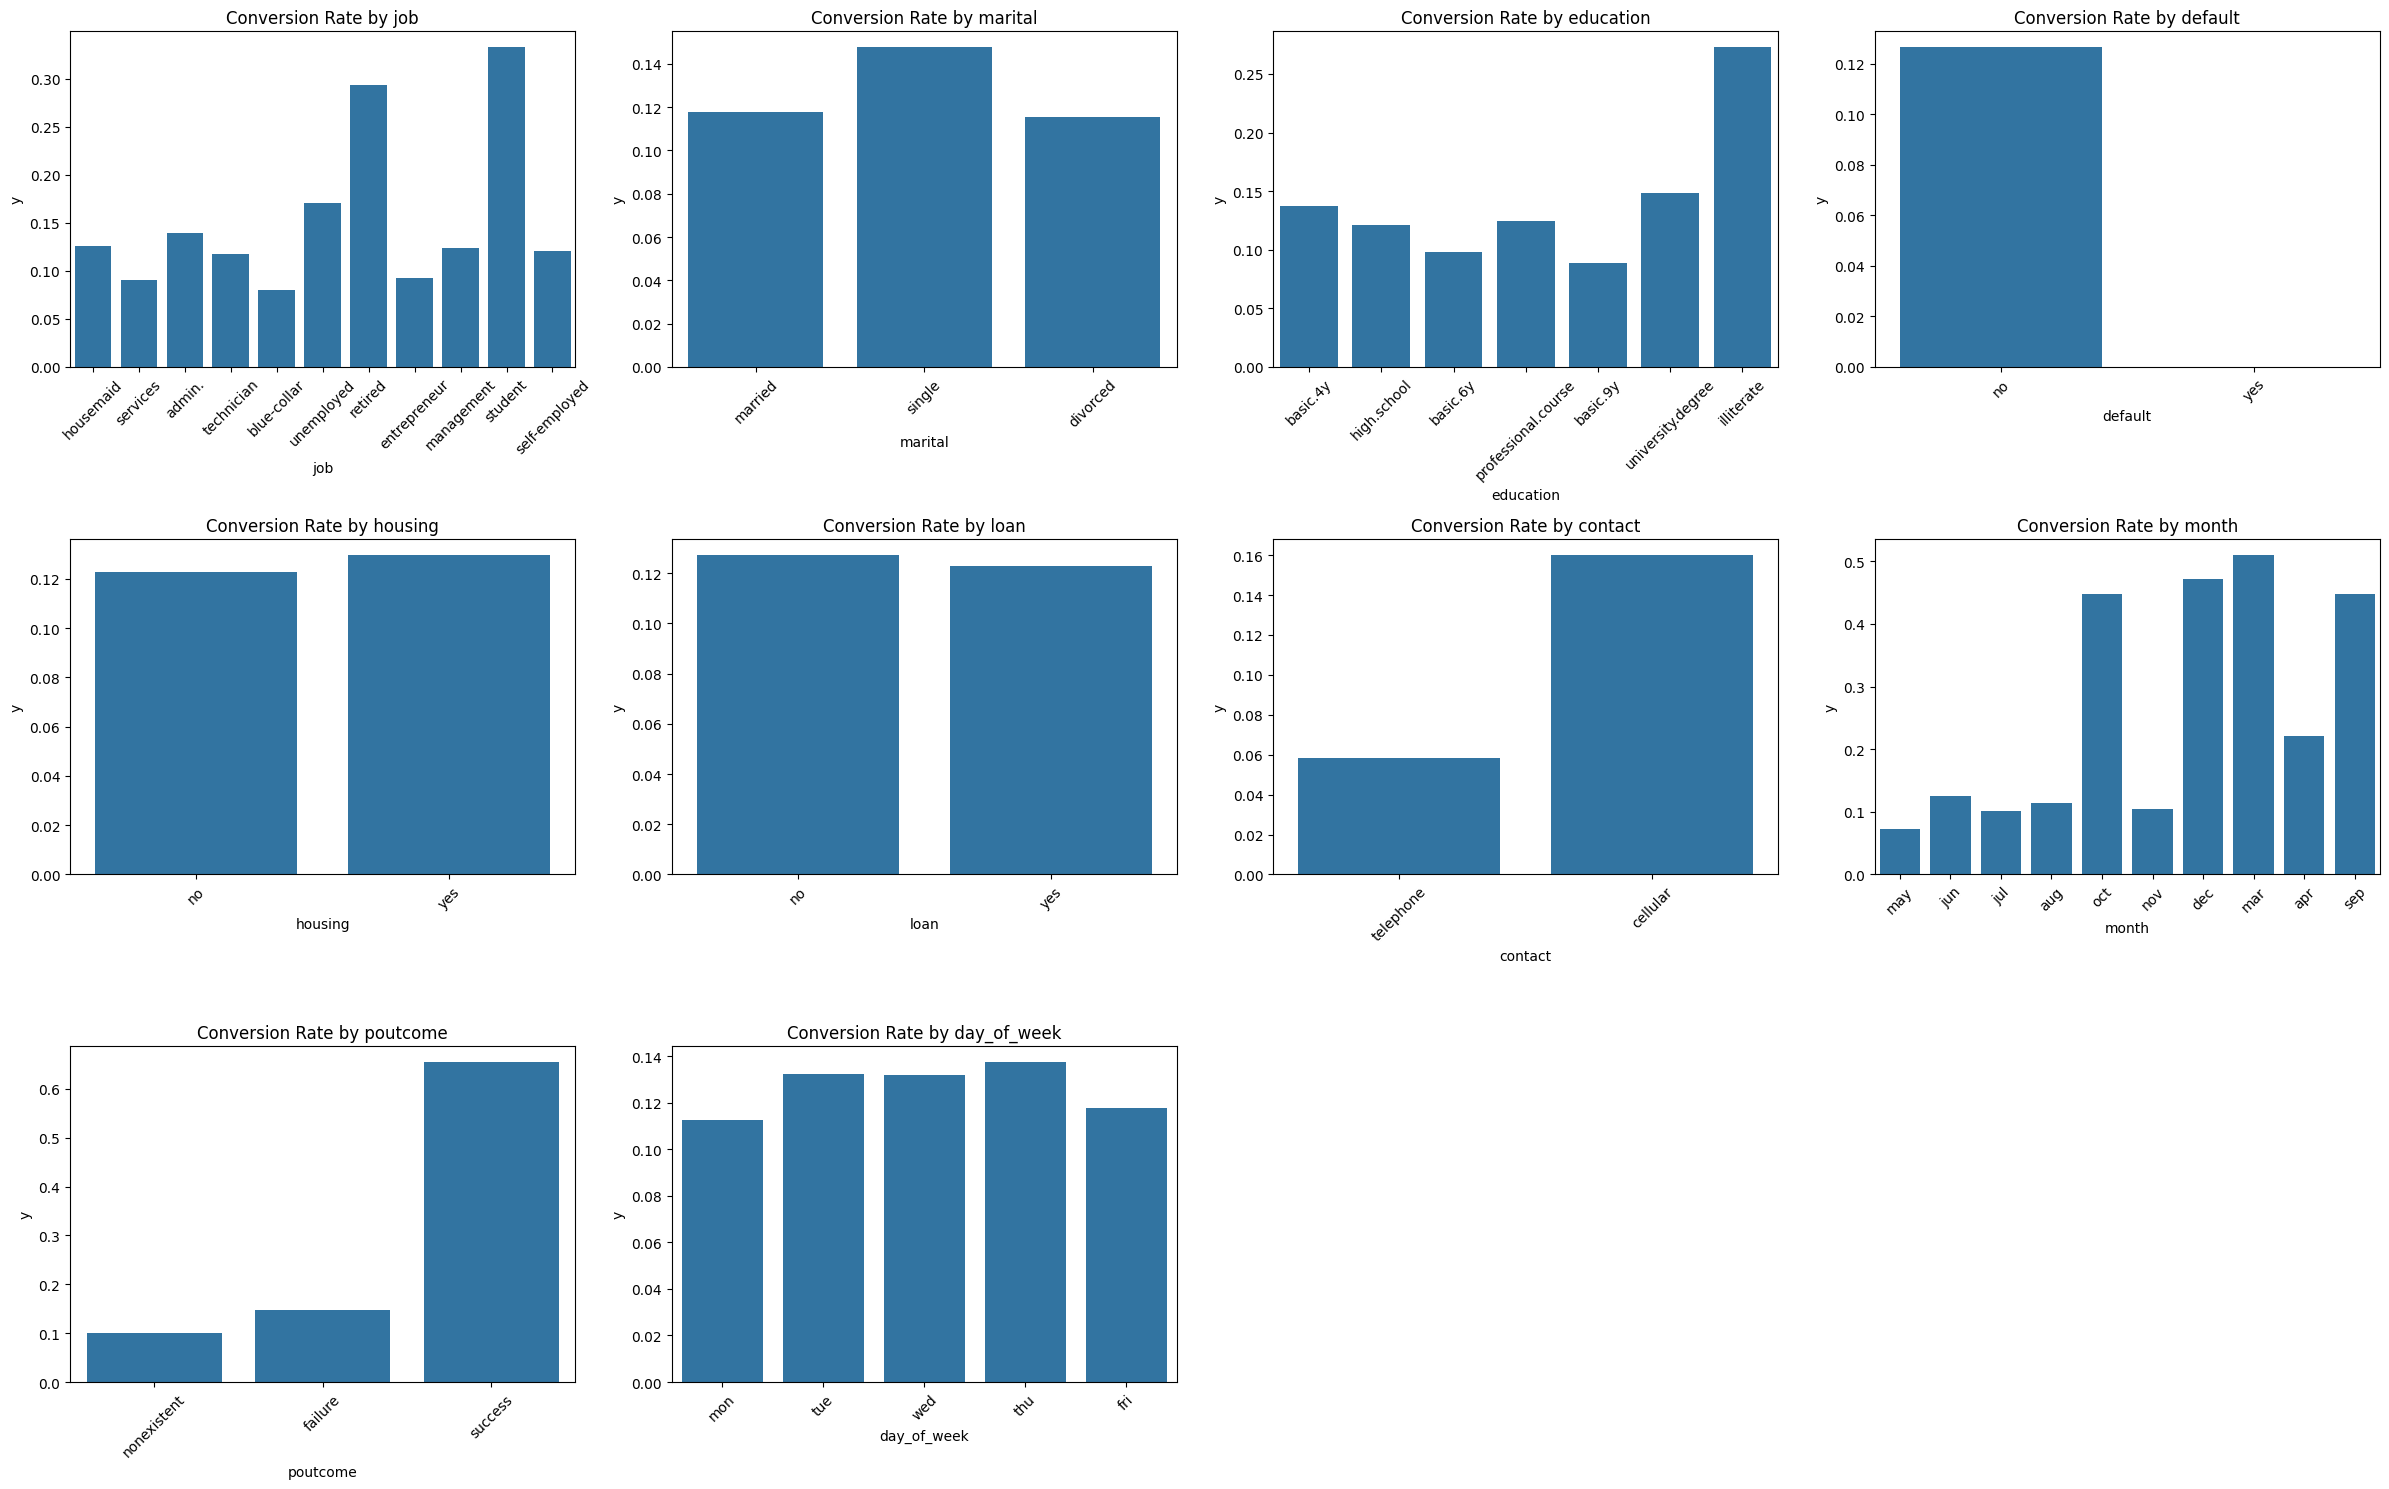

In [19]:
print(""" FINDINGS: 
    Most important Categorical features are: 
    1. 'Job', 'Education', 'Default', 'Month', 'Poutcome'
    2. "No Default" have a very significant impact on Conversion Rate
    3. "Student" and "Retired" have higher conversion rates (over 25%)
    4. "Illiterate" category have a higher conversion rate (over 25%) compared to other education levels
    5. "Sept, Oct, Dec and March" have over 40% conversion rates
    6. "Poutcome": Success of the previous campaign outcome leads to higher conversion rates (over 60%)""")

# Plot Categorical features and and conversion rate
plt.figure(figsize=(24, 15))
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_of_week']
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 4, i + 1)
    sns.barplot(x=feature, y='y', data=df, errorbar=None)
    plt.title(f'Conversion Rate by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Categorical_Features.png')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [20]:
# print the Business Problem Statement /Goal in few lines
print("""BUSINESS PROBLEM STATEMENT / BUSINESS GOAL: 
      
      1. The business goal is to find a model that can predict in advance whether a customer will subscribe to a term deposit 
         based on their demographic, past history and social and economic attributes. 
         - help the bank to target potential customers more effectively and improve their customer target effectiveness 
           and also optimise the marketing investment and other resources.

      2. This is a binary classification problem where the target variable is 'y' which indicates whether the customer has subscribed 
         to a term deposit or not (1 - Yes, 0 - No).
      3. The model will be trained on a dataset containing various features such as age, job, marital status, education, 
         default status, housing loan status, personal loan status, contact communication type,, last contact month of the year, 
         number of contacts performed during this campaign, number of days since the customer was last contacted from a previous campaign,
         number of contacts performed before this campaign and the outcome of the previous marketing campaign.

      4. Different classification models like Logistics Regression, Decision Tree, KNN and SVM will be used to predict the target variable

SUCCESS CRITERION:

      Deploy the model will predict whether a customer will Subscribe to Term Deposit or not with the following success criteria: 
      - Maximizing the conversion rate of the Marketing campaign and optimizing the Marketing dollars (Maximizing Precision)
      - Highest Recall of the positive class (y=1) while keeping accuracy over 80%
      - Optimizing the F1 Score (Precision-Recall Tradeoff)
      - Clear communication of the features that influence the Target Variable""")

BUSINESS PROBLEM STATEMENT / BUSINESS GOAL: 

      1. The business goal is to find a model that can predict in advance whether a customer will subscribe to a term deposit 
         based on their demographic, past history and social and economic attributes. 
         - help the bank to target potential customers more effectively and improve their customer target effectiveness 
           and also optimise the marketing investment and other resources.

      2. This is a binary classification problem where the target variable is 'y' which indicates whether the customer has subscribed 
         to a term deposit or not (1 - Yes, 0 - No).
      3. The model will be trained on a dataset containing various features such as age, job, marital status, education, 
         default status, housing loan status, personal loan status, contact communication type,, last contact month of the year, 
         number of contacts performed during this campaign, number of days since the customer was last 

In [21]:
# Creating a new dataframe BANK with selected Features
bank = df[["nr.employed", "emp.var.rate", "pdays", "campaign", "previous", "default", "month", "poutcome", "education", "job", "y"]]

bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nr.employed   30478 non-null  float64
 1   emp.var.rate  30478 non-null  float64
 2   pdays         30478 non-null  int64  
 3   campaign      30478 non-null  int64  
 4   previous      30478 non-null  int64  
 5   default       30478 non-null  object 
 6   month         30478 non-null  object 
 7   poutcome      30478 non-null  object 
 8   education     30478 non-null  object 
 9   job           30478 non-null  object 
 10  y             30478 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.6+ MB


In [22]:
# Distribution of the target variable y (only 12.7% customers were subscribed)

bank["y"].value_counts(normalize=True).round(3)

y
0    0.873
1    0.127
Name: proportion, dtype: float64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [23]:
# Defining the Input Features and Target Variable
X = bank.drop(columns=['y'])
y = bank['y']

In [24]:
# creating a pipeline for preprocessing

from sklearn.preprocessing import PolynomialFeatures

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['nr.employed', 'emp.var.rate', 'pdays',
                                  'campaign', 'previous']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['default', 'month', 'poutcome', 'education',
                                  'job'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:
# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (22858, 10), (22858,)
Testing set shape: (7620, 10), (7620,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [89]:
# BASELINE MODEL using DUMMY CLASSIFIER

In [26]:
# Dummy Classifier Baseline model shows high Accuracy of 87% But the Recall is 0.0%

# Train / test accuracies and Recall
from sklearn.dummy import DummyClassifier

dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])
dummy_model.fit(X_train, y_train)

dummy_train_score = dummy_model.score(X_train, y_train)
dummy_test_score = dummy_model.score(X_test, y_test)

# Accuracy Score
print(f"Dummy Training Accuracy: {dummy_train_score:.2f}")
print(f"Dummy Testing Accuracy: {dummy_test_score:.2f}")

# Recall Score
print(f"Dummy Testing Recall: {recall_score(y_test, dummy_model.predict(X_test)):.2f}")



Dummy Training Accuracy: 0.87
Dummy Testing Accuracy: 0.87
Dummy Testing Recall: 0.00


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [91]:
# LOGISTICS REGRESSION BASELINE MODEL

In [27]:
# Creating a Logistics Pipeline and Fitting the Model and calculating the Accuracies and Recall

log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
# Fit the model
log_pipeline.fit(X_train, y_train)

# print the fit time for Logistic Regression
from time import time
start_time = time()
log_pipeline.fit(X_train, y_train)
log_fit_time = time() - start_time
print(f"Fit time for Logistic Regression: {log_fit_time:.2f} seconds")

# calculate the train and test accuracy
log_train_accuracy = log_pipeline.score(X_train, y_train)
log_test_accuracy = log_pipeline.score(X_test, y_test)

# print the train and test accuracy
print(f"Logistic Training Accuracy: {log_train_accuracy:.2f}")
print(f"Logistic Testing Accuracy: {log_test_accuracy:.2f}")

# Recall Score
print(f"Logistic Testing Recall: {recall_score(y_test, log_pipeline.predict(X_test)):.2f}")

# Precision Score
print(f"Logistic Testing Precision: {precision_score(y_test, log_pipeline.predict(X_test)):.2f}")
# F1 Score
print(f"Logistic Testing F1 Score: {f1_score(y_test, log_pipeline.predict(X_test)):.2f}")

Fit time for Logistic Regression: 0.03 seconds
Logistic Training Accuracy: 0.89
Logistic Testing Accuracy: 0.88
Logistic Testing Recall: 0.21
Logistic Testing Precision: 0.63
Logistic Testing F1 Score: 0.32


In [28]:
# KNN BASELINE MODEL

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
# Fit the model
knn_pipeline.fit(X_train, y_train)

# print the fit time for Logistic Regression
from time import time
start_time = time()
knn_pipeline.fit(X_train, y_train)
knn_fit_time = time() - start_time
print(f"Fit time for KNN: {knn_fit_time:.2f} seconds")

# calculate the train and test accuracy
knn_train_accuracy = knn_pipeline.score(X_train, y_train)
knn_test_accuracy = knn_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {knn_train_accuracy:.2f}")
print(f"Testing Accuracy: {knn_test_accuracy:.2f}")

# Recall Score
print(f"KNN Testing Recall: {recall_score(y_test, knn_pipeline.predict(X_test)):.2f}")

# Precision Score
print(f"KNN Testing Precision: {precision_score(y_test, knn_pipeline.predict(X_test)):.2f}")
# F1 Score
print(f"KNN Testing F1 Score: {f1_score(y_test, knn_pipeline.predict(X_test)):.2f}")


Fit time for KNN: 0.02 seconds
Training Accuracy: 0.90
Testing Accuracy: 0.87
KNN Testing Recall: 0.28
KNN Testing Precision: 0.51
KNN Testing F1 Score: 0.36


In [29]:
# DECISION TREE BASELINE MODEL

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Fit the model
dt_pipeline.fit(X_train, y_train)

# print the fit time for Decision Tree
from time import time
start_time = time()
dt_pipeline.fit(X_train, y_train)
dt_fit_time = time() - start_time
print(f"Fit time for Decision Tree: {dt_fit_time:.2f} seconds")


# calculate the train and test accuracy
dt_train_accuracy = dt_pipeline.score(X_train, y_train)
dt_test_accuracy = dt_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {dt_train_accuracy:.2f}")
print(f"Testing Accuracy: {dt_test_accuracy:.2f}")

# Recall Score
print(f"Decision Tree Testing Recall: {recall_score(y_test, dt_pipeline.predict(X_test)):.2f}")

# Precision Score
print(f"Decision Tree Testing Precision: {precision_score(y_test, dt_pipeline.predict(X_test)):.2f}")
# F1 Score
print(f"Decision Tree Testing F1 Score: {f1_score(y_test, dt_pipeline.predict(X_test)):.2f}")


Fit time for Decision Tree: 0.14 seconds
Training Accuracy: 0.93
Testing Accuracy: 0.87
Decision Tree Testing Recall: 0.26
Decision Tree Testing Precision: 0.49
Decision Tree Testing F1 Score: 0.34


In [30]:
# SVM BASELINE MODEL

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
# Fit the model
svm_pipeline.fit(X_train, y_train)

# print the fit time for SVM
from time import time
start_time = time()
svm_pipeline.fit(X_train, y_train)
svm_fit_time = time() - start_time
print(f"Fit time for SVM: {svm_fit_time:.2f} seconds")


# calculate the train and test accuracy
svm_train_accuracy = svm_pipeline.score(X_train, y_train)
svm_test_accuracy = svm_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {svm_train_accuracy:.2f}")
print(f"Testing Accuracy: {svm_test_accuracy:.2f}")

# Recall Score
print(f"SVM Testing Recall: {recall_score(y_test, svm_pipeline.predict(X_test)):.2f}")

# Precision Score
print(f"SVM Testing Precision: {precision_score(y_test, svm_pipeline.predict(X_test)):.2f}")
# F1 Score
print(f"SVM Testing F1 Score: {f1_score(y_test, svm_pipeline.predict(X_test)):.2f}")


Fit time for SVM: 5.36 seconds
Training Accuracy: 0.89
Testing Accuracy: 0.89
SVM Testing Recall: 0.23
SVM Testing Precision: 0.64
SVM Testing F1 Score: 0.34


### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
# SCORED all the Model in the Above Cells

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
print("""FINDINGS: 
      1. While all the models show similar test accuracies, there are notable differences in their recall scores.
      2. Logistic Regression and Decision Tree models show the highest recall scores, indicating their effectiveness in identifying positive cases (subscribed customers).
      3. Fit time is extremely high for SVM (5.3 Seconds) as compared to all other models""")

# Dataframe with Train and Test accuracies, train and test recalls and Fit time

baseline_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Accuracy': [log_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [log_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy],
    'Test Recall': [recall_score(y_test, log_pipeline.predict(X_test)),
                    recall_score(y_test, knn_pipeline.predict(X_test)),
                    recall_score(y_test, dt_pipeline.predict(X_test)),
                    recall_score(y_test, svm_pipeline.predict(X_test))],
    'Test Precision': [precision_score(y_test, log_pipeline.predict(X_test)),
                      precision_score(y_test, knn_pipeline.predict(X_test)),
                      precision_score(y_test, dt_pipeline.predict(X_test)),
                      precision_score(y_test, svm_pipeline.predict(X_test))],
    'Test F1 Score': [f1_score(y_test, log_pipeline.predict(X_test)),
                      f1_score(y_test, knn_pipeline.predict(X_test)),
                      f1_score(y_test, dt_pipeline.predict(X_test)),
                      f1_score(y_test, svm_pipeline.predict(X_test))],
    'Fit Time': [log_fit_time, knn_fit_time, dt_fit_time, svm_fit_time]
})
baseline_results.round(2)

FINDINGS: 
      1. While all the models show similar test accuracies, there are notable differences in their recall scores.
      2. Logistic Regression and Decision Tree models show the highest recall scores, indicating their effectiveness in identifying positive cases (subscribed customers).
      3. Fit time is extremely high for SVM (3.9 Seconds) as compared to all other models


,Model,Train Accuracy,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Fit Time
0,Logistic Regression,0.89,0.88,0.21,0.63,0.32,0.03
1,KNN,0.90,0.87,0.28,0.51,0.36,0.02
2,Decision Tree,0.93,0.87,0.26,0.49,0.34,0.14
3,SVM,0.89,0.89,0.23,0.64,0.34,5.36


FINDINGS: 
      1. While all the models show similar test accuracies, there are notable differences in their recall scores.


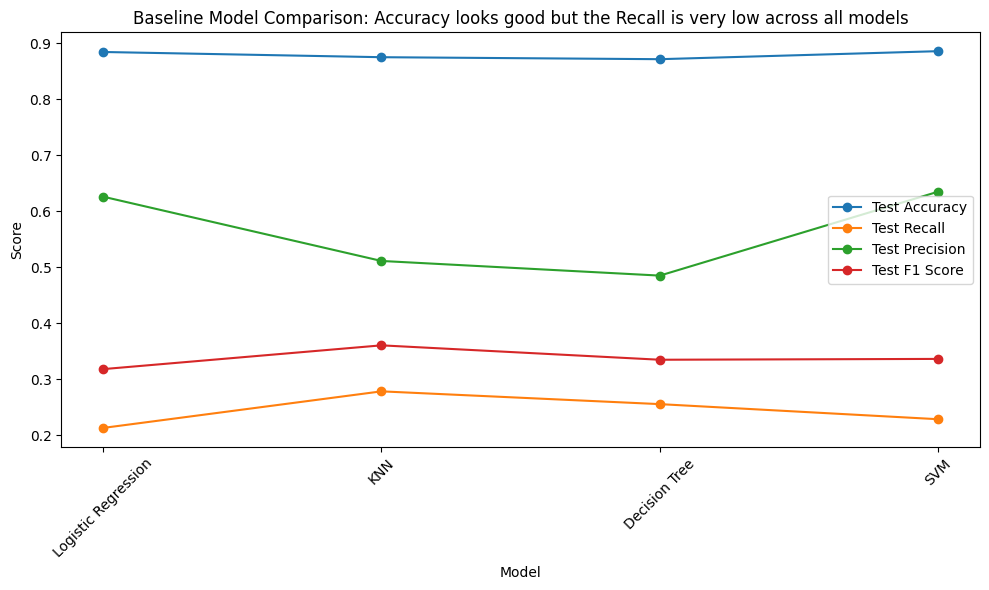

In [32]:
print("""FINDINGS: 
      1. While all the models show similar test accuracies, there are notable differences in their recall scores.""")


# Test Recall and Test accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(baseline_results['Model'], baseline_results['Test Accuracy'], label='Test Accuracy', marker='o')
plt.plot(baseline_results['Model'], baseline_results['Test Recall'], label='Test Recall', marker='o')
plt.plot(baseline_results['Model'], baseline_results['Test Precision'], label='Test Precision', marker='o')
plt.plot(baseline_results['Model'], baseline_results['Test F1 Score'], label='Test F1 Score', marker='o')

plt.title('Baseline Model Comparison: Accuracy looks good but the Recall is very low across all models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(['Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score'])

plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Baseline_Model_Comparison.png')
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [33]:
# LOGISTICS REGRESSION: Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
log_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': ['balanced'],  # integer keys for class_weight
    'classifier__max_iter': [100, 200, 300]
}
log_grid_search = GridSearchCV(log_pipeline, log_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
log_grid_search.fit(X_train, y_train)

print(f"Logistic Regression Best Parameters: {log_grid_search.best_params_}")

log_best_model = log_grid_search.best_estimator_

# Train and test accuracies
log_best_train_accuracy = log_best_model.score(X_train, y_train)
log_best_test_accuracy = log_best_model.score(X_test, y_test)
print(f"Logistic Regression Grid Search Training Accuracy: {log_best_train_accuracy:.2f}")
print(f"Logistic Regression Grid Search Testing Accuracy: {log_best_test_accuracy:.2f}")

# Test recall
print(f"Logistic Regression Grid Search Testing Recall: {recall_score(y_test, log_best_model.predict(X_test)):.2f}")

# Test precision
print(f"Logistic Regression Grid Search Testing Precision: {precision_score(y_test, log_best_model.predict(X_test)):.2f}")

Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Logistic Regression Grid Search Training Accuracy: 0.81
Logistic Regression Grid Search Testing Accuracy: 0.81
Logistic Regression Grid Search Testing Recall: 0.63
Logistic Regression Grid Search Testing Precision: 0.36


In [34]:
# KNN : Hyper Parameter tuning using GridSearchCV

knn_param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

print(f"KNN Best Parameters: {knn_grid_search.best_params_}")

knn_best_model = knn_grid_search.best_estimator_

# Train and test accuracies
knn_best_train_accuracy = knn_best_model.score(X_train, y_train)
knn_best_test_accuracy = knn_best_model.score(X_test, y_test)
print(f"KNN Grid Search Training Accuracy: {knn_best_train_accuracy:.2f}")
print(f"KNN Grid Search Testing Accuracy: {knn_best_test_accuracy:.2f}")

# Test recall
print(f"KNN Grid Search Testing Recall: {recall_score(y_test, knn_best_model.predict(X_test)):.2f}")

# Test precision
print(f"KNN Grid Search Testing Precision: {precision_score(y_test, knn_best_model.predict(X_test)):.2f}")


KNN Best Parameters: {'classifier__n_neighbors': 15, 'classifier__p': 2, 'classifier__weights': 'uniform'}
KNN Grid Search Training Accuracy: 0.89
KNN Grid Search Testing Accuracy: 0.88
KNN Grid Search Testing Recall: 0.24
KNN Grid Search Testing Precision: 0.58


In [35]:
# DECISION TREES : Hyper Parameter tuning using GridSearchCV
dt_param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced'],
    'classifier__criterion': ['gini', 'entropy'],
}
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

print(f"Decision Tree Best Parameters: {dt_grid_search.best_params_}")

dt_best_model = dt_grid_search.best_estimator_

# Train and test accuracies
dt_best_train_accuracy = dt_best_model.score(X_train, y_train)
dt_best_test_accuracy = dt_best_model.score(X_test, y_test)
print(f"Decision Tree Grid Search Training Accuracy: {dt_best_train_accuracy:.2f}")
print(f"Decision Tree Grid Search Testing Accuracy: {dt_best_test_accuracy:.2f}")

# Test recall
print(f"Decision Tree Grid Search Testing Recall: {recall_score(y_test, dt_best_model.predict(X_test)):.2f}")

# Test precision
print(f"Decision Tree Grid Search Testing Precision: {precision_score(y_test, dt_best_model.predict(X_test)):.2f}")


Decision Tree Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Decision Tree Grid Search Training Accuracy: 0.83
Decision Tree Grid Search Testing Accuracy: 0.82
Decision Tree Grid Search Testing Recall: 0.62
Decision Tree Grid Search Testing Precision: 0.38


In [36]:
# SVM : Hyper Parameter tuning using GridSearchCV
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf'],
    'classifier__class_weight': ['balanced'],
    'classifier__probability': [True]
}
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print(f"SVM Best Parameters: {svm_grid_search.best_params_}")

svm_best_model = svm_grid_search.best_estimator_

# Train and test accuracies
svm_best_train_accuracy = svm_best_model.score(X_train, y_train)
svm_best_test_accuracy = svm_best_model.score(X_test, y_test)
print(f"SVM Grid Search Training Accuracy: {svm_best_train_accuracy:.2f}")
print(f"SVM Grid Search Testing Accuracy: {svm_best_test_accuracy:.2f}")

# Test recall
print(f"SVM Grid Search Testing Recall: {recall_score(y_test, svm_best_model.predict(X_test)):.2f}")

# Test precision
print(f"SVM Grid Search Testing Precision: {precision_score(y_test, svm_best_model.predict(X_test)):.2f}")


SVM Best Parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf', 'classifier__probability': True}
SVM Grid Search Training Accuracy: 0.83
SVM Grid Search Testing Accuracy: 0.82
SVM Grid Search Testing Recall: 0.64
SVM Grid Search Testing Precision: 0.38


In [37]:
# COMPARING AND EVALUATING THE BEST MODELS


In [38]:
print("""FINDINGS:
      1. SVM and Decision Tree models show the highest recall scores and also good precision, indicating their effectiveness in identifying positive cases (subscribed customers).
      2. Overall, all models perform well in terms of accuracy, but recall is a critical metric for this problem.""")
# DataFrame with train and test accuracies of best model for KNN, Logistic regression, Decision trees and SVM
best_model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Accuracy': [log_best_train_accuracy, knn_best_train_accuracy, dt_best_train_accuracy, svm_best_train_accuracy],
    'Test Accuracy': [log_best_test_accuracy, knn_best_test_accuracy, dt_best_test_accuracy, svm_best_test_accuracy],
    'Test Recall': [recall_score(y_test, log_best_model.predict(X_test)),
                    recall_score(y_test, knn_best_model.predict(X_test)),
                    recall_score(y_test, dt_best_model.predict(X_test)),
                    recall_score(y_test, svm_best_model.predict(X_test))],
    'Test Precision': [precision_score(y_test, log_best_model.predict(X_test)),
                      precision_score(y_test, knn_best_model.predict(X_test)),
                      precision_score(y_test, dt_best_model.predict(X_test)),
                      precision_score(y_test, svm_best_model.predict(X_test))]
})
best_model_results.round(2)


FINDINGS:
      1. SVM and Decision Tree models show the highest recall scores and also good precision, indicating their effectiveness in identifying positive cases (subscribed customers).
      2. Overall, all models perform well in terms of accuracy, but recall is a critical metric for this problem.


,Model,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,Logistic Regression,0.81,0.81,0.63,0.36
1,KNN,0.89,0.88,0.24,0.58
2,Decision Tree,0.83,0.82,0.62,0.38
3,SVM,0.83,0.82,0.64,0.38


FINDINGS:
1. Decision Trees has the best recall at 63%
2. SVM has the highest Precision of 39%, followed by Decision Trees at 38% and Logistic Regression at 35%
3. Interpretability: Logictics Regression and Decision Trees are easy to intepret and communicate
4. WILL SELECT DECISION TREES AS THE FINAL MODEL: Very high recall (63%) and Conversion rate of 38%



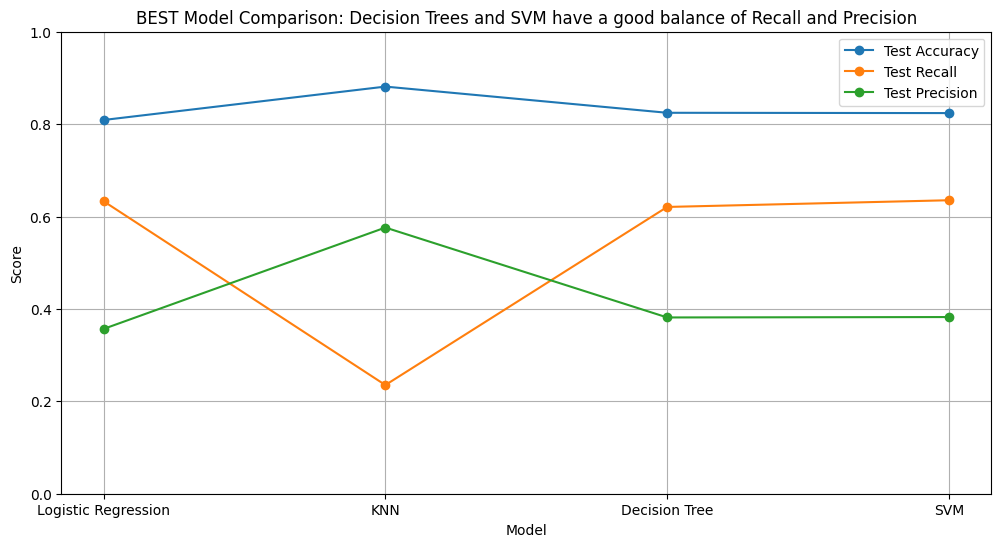

In [39]:
print("""FINDINGS:
1. Decision Trees has the best recall at 63%
2. SVM has the highest Precision of 39%, followed by Decision Trees at 38% and Logistic Regression at 35%
3. Interpretability: Logictics Regression and Decision Trees are easy to intepret and communicate
4. WILL SELECT DECISION TREES AS THE FINAL MODEL: Very high recall (63%) and Conversion rate of 38%
""")

# Comparing Test Accuracy, Test Recall and Test Precision for all the models
plt.figure(figsize=(12, 6))
metrics = ['Test Accuracy', 'Test Recall', 'Test Precision']
x = best_model_results['Model']

for metric in metrics:
    y = best_model_results[metric]
    plt.plot(x, y, marker='o', label=metric)

plt.title('BEST Model Comparison: Decision Trees and SVM have a good balance of Recall and Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Best_Model_Comparison.png')
plt.show()


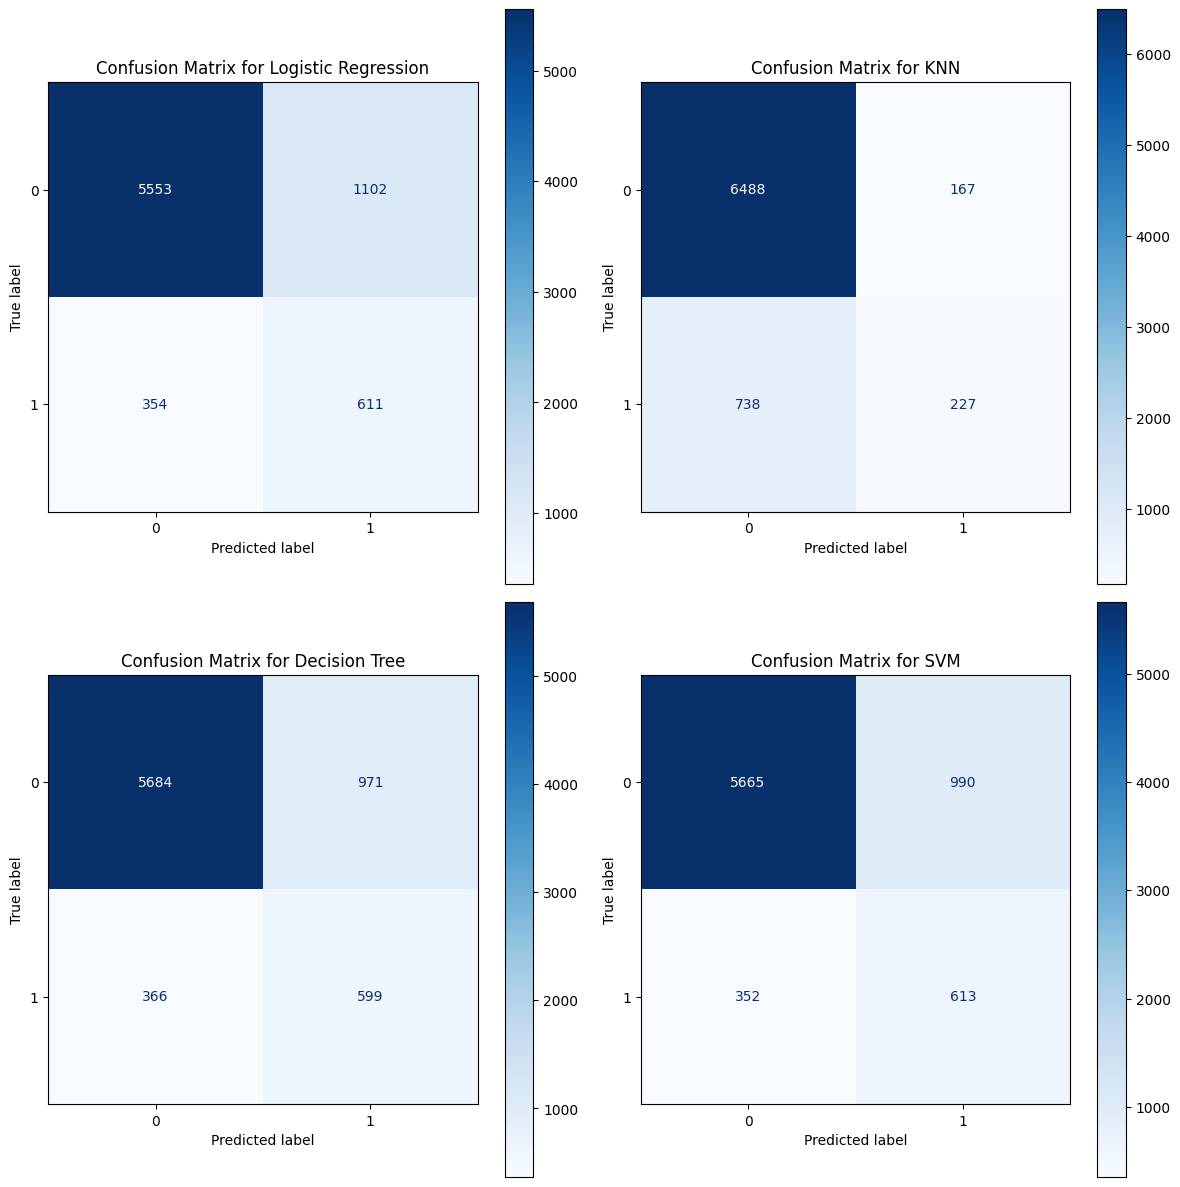

In [40]:
# FINDINGS: Decision Trees is the best model for high Recall and Precision Balance and ease of interpretability.
# And also, easy to change the Threshold to 0.35 which will give a higher Recall of 70% but precision (conversion Rate) will go down to 25%

# Display the confusion matrix for all models and show as subplots

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': log_best_model,
    'KNN': knn_best_model,
    'Decision Tree': dt_best_model,
    'SVM': svm_best_model
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')

plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Best_models_Confusion_Matrix.png')
plt.show()


In [41]:
# CLASSIFICATION REPORT FOR ALL MODELS
# DECISION TREES shows the BEST RESULTS for PRECISION, RECALL and ACCURACY
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': log_best_model,
    'Decision Tree': dt_best_model,
    'SVM': svm_best_model,
    'KNN': knn_best_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6655
           1       0.36      0.63      0.46       965

    accuracy                           0.81      7620
   macro avg       0.65      0.73      0.67      7620
weighted avg       0.87      0.81      0.83      7620

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      6655
           1       0.38      0.62      0.47       965

    accuracy                           0.82      7620
   macro avg       0.66      0.74      0.68      7620
weighted avg       0.87      0.82      0.84      7620

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      6655
           1       0.38      0.64      0.48       965

    accuracy                           0.82      7620
   mac

In [42]:
print("""COMMUNICATING RESULTS to STAKEHOLDERS""")

COMMUNICATING RESULTS to STAKEHOLDERS


In [43]:
print("""RESULT
      
1. Best Model: Decision Tree: Balance between Recall, Precision and Accuracy
2. Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
3. Training Accuracy: 0.85
4. Testing Accuracy: 0.82
5. Testing Recall: 0.63
6. Testing Precision: 0.38

- Factors that influence the Decision to Subscribe to Term Deposit:
      
  - "nr.employed"
  - "pdays"
  - "previous"
  - "month"
  - "poutcome"
  
""")

RESULT

1. Best Model: Decision Tree: Balance between Recall, Precision and Accuracy
2. Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
3. Training Accuracy: 0.85
4. Testing Accuracy: 0.82
5. Testing Recall: 0.63
6. Testing Precision: 0.38

- Factors that influence the Decision to Subscribe to Term Deposit:

  - "nr.employed"
  - "pdays"
  - "previous"
  - "month"
  - "poutcome"




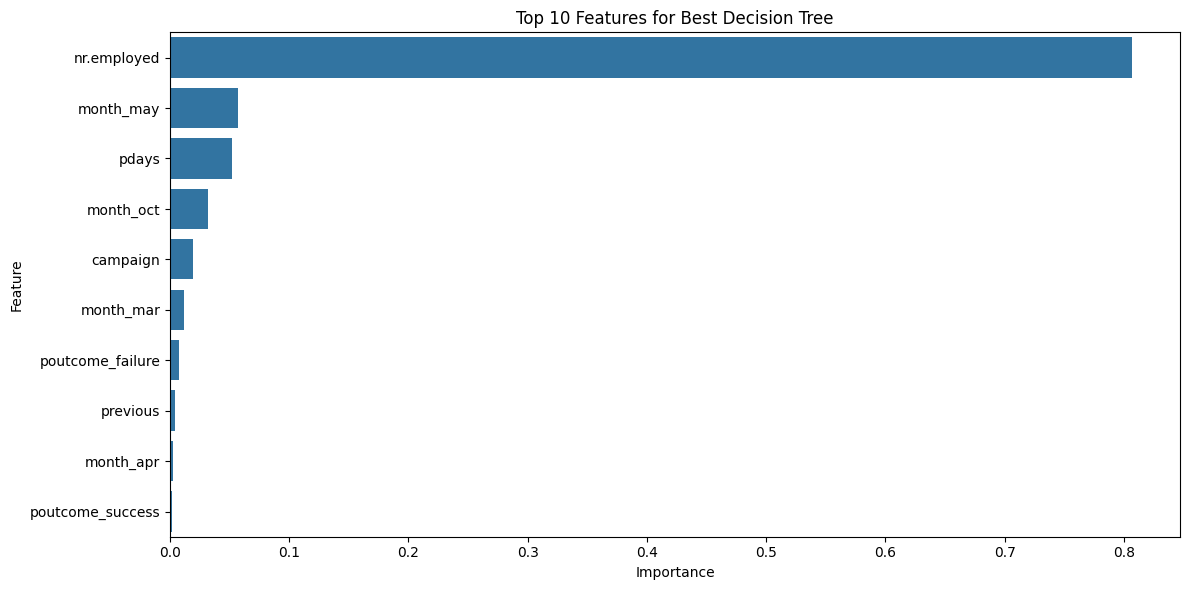

In [44]:
# Identify the Features for the BBest Decision Tree
pre = dt_best_model.named_steps['preprocessor']

# Reconstruct original feature lists (must match what you used to fit)
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Get OneHotEncoder feature names
ohe = pre.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Concatenate in the same order ColumnTransformer outputs them: num first, then cat
full_feature_names = list(numerical_features) + list(ohe_feature_names)

# Sanity check
assert len(full_feature_names) == dt_best_model.named_steps['classifier'].n_features_in_

# Identify the Features for the Best Decision Tree
best_features = dt_best_model.named_steps['classifier'].feature_importances_
feature_names = full_feature_names

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_features
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features for Best Decision Tree')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Best_Decision_Tree_Features.png')
plt.show()

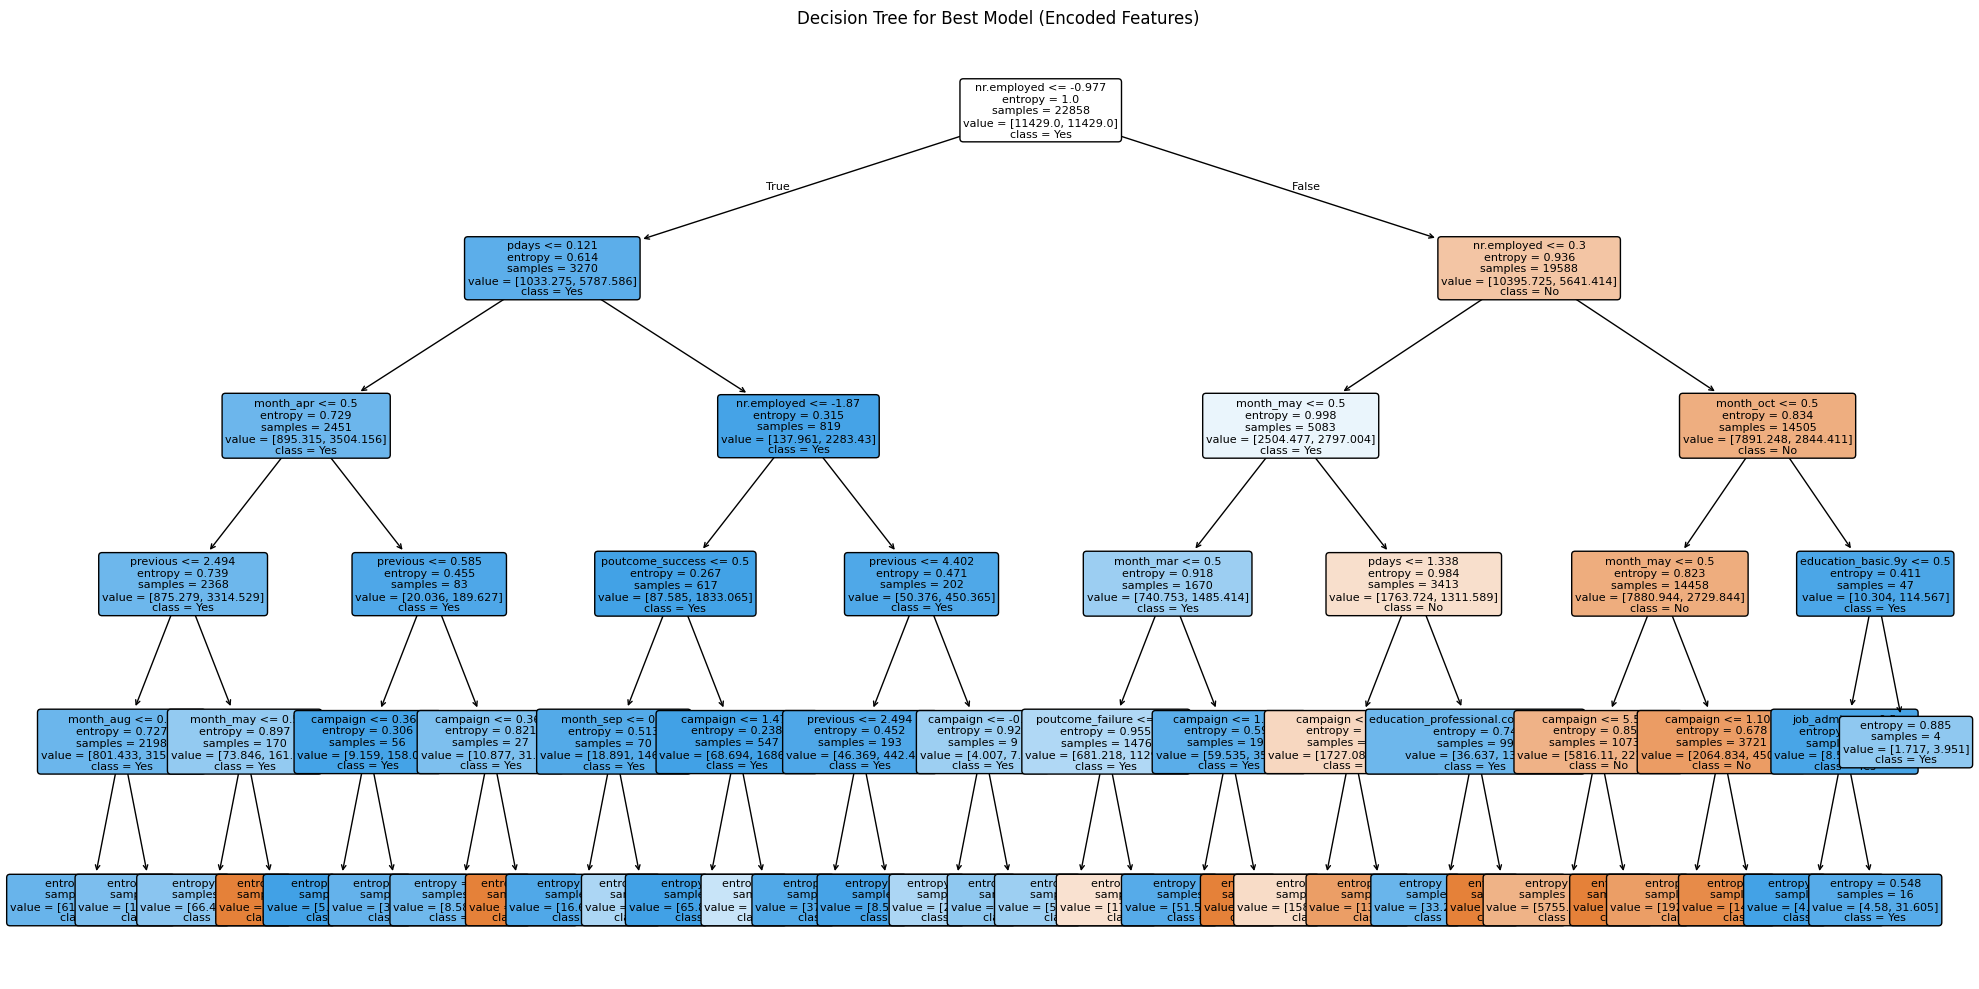

In [45]:
# Decision Tree for the Best Decision tree model
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
dtree = plot_tree(
    dt_best_model.named_steps['classifier'],
    feature_names=full_feature_names,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Decision Tree for Best Model (Encoded Features)')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Decision_Tree.png', dpi=150)
plt.show()


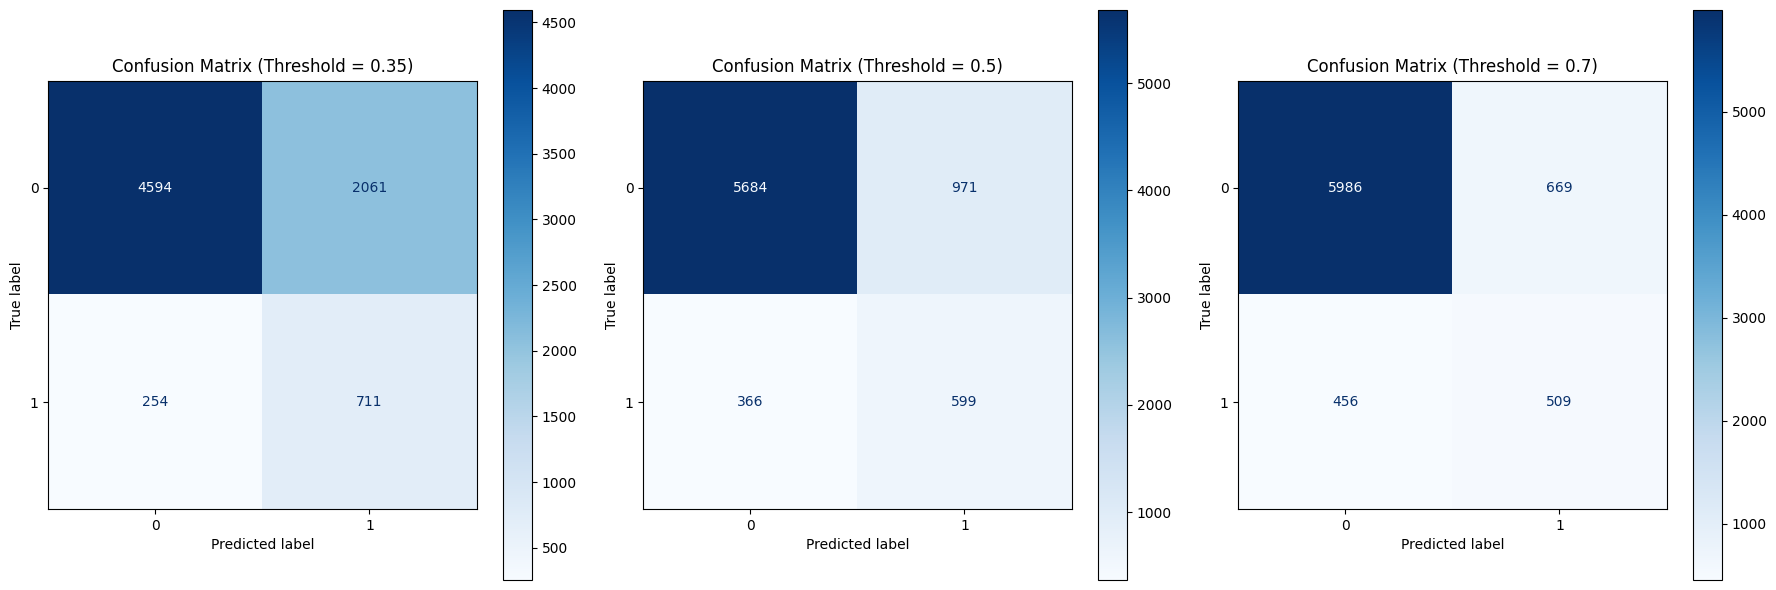

In [46]:
# Confusion Matrix for the Best Decision Tree Model at thresholds of 0.35, 0.5 and 0.7
thresholds = [0.35, 0.5, 0.7]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, threshold in zip(axes, thresholds):
    y_pred = (dt_best_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best_model.classes_)
    disp.plot(cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix (Threshold = {threshold})')

plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/Best_Decision_Tree_Confusion_Matrix.png')
plt.show()


Logistic Regression AUC-ROC Score: 0.79
Decision Tree AUC-ROC Score: 0.78
SVM AUC-ROC Score: 0.77
KNN AUC-ROC Score: 0.75


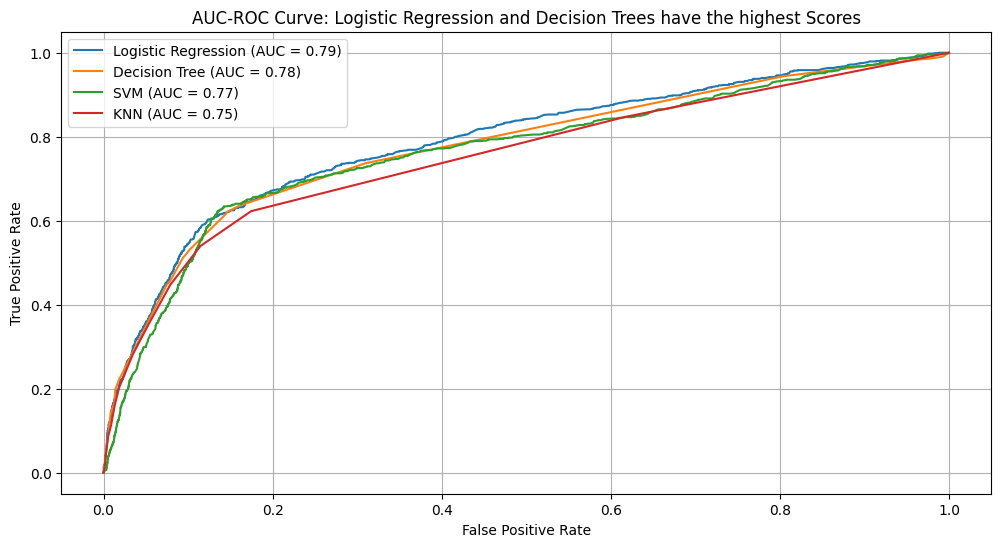

In [47]:
# PLOT THE AUC-ROC CURVE
from sklearn.metrics import roc_curve, auc

# AUC-ROC Score for all the models
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f"{model_name} AUC-ROC Score: {roc_auc:.2f}")
# PLOT THE AUC-ROC SCORE FOR ALL MODELS
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve: Logistic Regression and Decision Trees have the highest Scores')
plt.legend()
plt.grid()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application III/module17_starter/Images - Analysis/AUC_ROC_Curve.png')
plt.show()

In [48]:
print("""NEXT STEPS

1. Work with the Marketing team to implement targeted campaigns based on model insights.
2. Understand the Marketing Objectives to achieve:
       - For Maximizing Revenue, we need to lower the Threshold for highest Positive recall but the conversion rate will be same.
       - For Maximizing Return on Marketing Investment (ROMI), Strike a balance between Recall and Conversion rate (Precision): default threshold: 0.5
       - For Maximizing the limited budget, balance the threshold to have a conversion rate of 25% and still have a decent recall rate.
       """)

NEXT STEPS

1. Work with the Marketing team to implement targeted campaigns based on model insights.
2. Understand the Marketing Objectives to achieve:
       - For Maximizing Revenue, we need to lower the Threshold for highest Positive recall but the conversion rate will be same.
       - For Maximizing Return on Marketing Investment (ROMI), Strike a balance between Recall and Conversion rate (Precision): default threshold: 0.5
       - For Maximizing the limited budget, balance the threshold to have a conversion rate of 25% and still have a decent recall rate.
       


##### Questions